# Setting up the environment (note: please use a python kernal for this script)

## Loading python packages

In [1]:
import pandas as pd # load and manipulate data for One-Hot ncoding
import numpy as np # calculate the mean and std. dev. 
import matplotlib.pyplot as plt # to plot figures
# !pip install xgboost --quiet
import xgboost as xgb # XGBoost engine..someone has to work, no?
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validations
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Loading data 

In [2]:
df = pd.DataFrame(pd.read_excel(r'C:\Users\asifr\OneDrive - State of New Mexico\Documents\Project Oil Price\Outputs\df_final.xlsx'))
pd.options.display.max_columns = 500
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df = df.loc[df.index < '01-01-2024']
df

,nm_oil_price,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sead,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_con22,sv_covid19,sv_gfc,sv_lpc,sv_opec
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-01,18.382252,-4.342383,-3.968467,19.839120,0.006341,0.227692,25.182127,0.598185,-1.049224,-0.878374,-860.532052,209.852757,0.008106,29.522924,24.809339,24.809339,0.084463,1.138198,1.138198,-1.118946,5.075132,56.341081,0.886441,1,0,0,0,0,0
2002-01-01,19.688715,0.427090,1.022115,21.054340,0.274799,0.267035,24.369796,0.248901,-2.372902,-0.483836,-886.492953,165.252032,0.073489,29.581693,26.429118,26.429118,0.324740,0.941955,0.941955,-1.218224,6.418517,50.448373,0.874506,1,0,0,0,0,0
2002-04-01,24.628390,4.314811,3.536845,22.390446,0.304478,0.281793,22.733795,0.117970,-0.235625,-0.611690,-136.395130,514.958291,0.173884,31.382044,28.561953,28.561953,0.136906,1.512703,1.512703,-0.638675,6.401378,-14.152539,0.243086,1,0,0,0,0,0
2002-07-01,26.950806,1.127654,0.855471,25.571612,0.041236,0.398350,30.216726,-0.066227,-0.265306,0.415096,278.343246,-212.358794,0.255128,32.301880,26.088024,26.088024,-0.388310,0.861509,0.861509,-0.180427,6.009794,-50.993165,-1.084011,1,0,0,0,0,0
2002-10-01,26.055377,1.891115,2.044512,26.010084,-0.031823,0.446995,33.527721,0.067198,-0.856318,0.164035,743.943666,104.734647,0.280038,34.560932,27.841472,27.841472,0.021625,0.025518,0.025518,0.427349,4.452041,-47.218326,0.445259,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,82.709246,-8.473781,-10.735306,86.095092,-0.111888,1.318156,23.570406,0.082760,0.079301,-0.903986,308.596327,85.197106,0.199640,21.486896,5.892569,5.892569,0.007855,0.081845,0.081845,0.459791,4.370983,-34.955475,0.413827,0,1,0,0,0,0
2023-01-01,74.988884,-8.722612,-9.820590,83.411862,-0.039649,1.199596,21.067296,-0.112388,3.005648,-0.464225,410.583015,192.563426,0.384574,4.319581,10.418087,10.418087,0.344668,-2.102374,-2.102374,1.573151,2.322009,-62.081794,0.097760,0,0,0,0,0,0
2023-04-01,74.403726,-4.783938,-5.413929,81.985328,0.065365,0.589772,16.543778,0.031577,-0.399971,-1.142951,440.906662,150.267333,0.116620,1.124914,3.925616,3.925616,-0.800367,-4.284504,-4.284504,1.547432,1.353702,54.538415,0.922144,0,0,0,0,0,0


# Visualizing the target variable : nm_oil_price

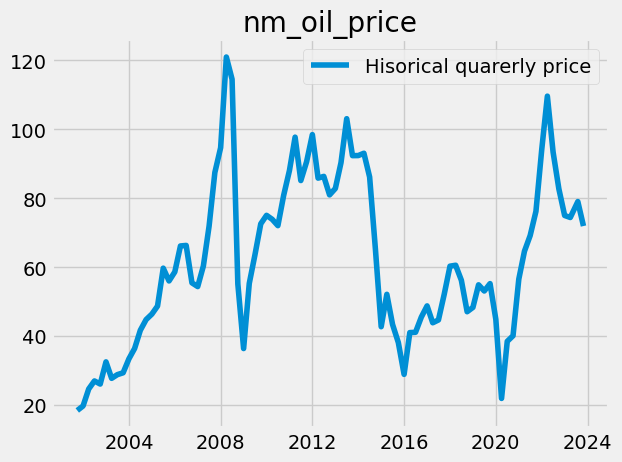

In [3]:
plt.plot(df['nm_oil_price'], label = 'Hisorical quarerly price')
plt.title('nm_oil_price')
plt.legend()

In [4]:
df_nm = df[['nm_oil_price']].copy(deep= True)

In [5]:
df_nm.head()

,nm_oil_price
Date,
2001-10-01,18.382252
2002-01-01,19.688715
2002-04-01,24.628390
2002-07-01,26.950806
2002-10-01,26.055377


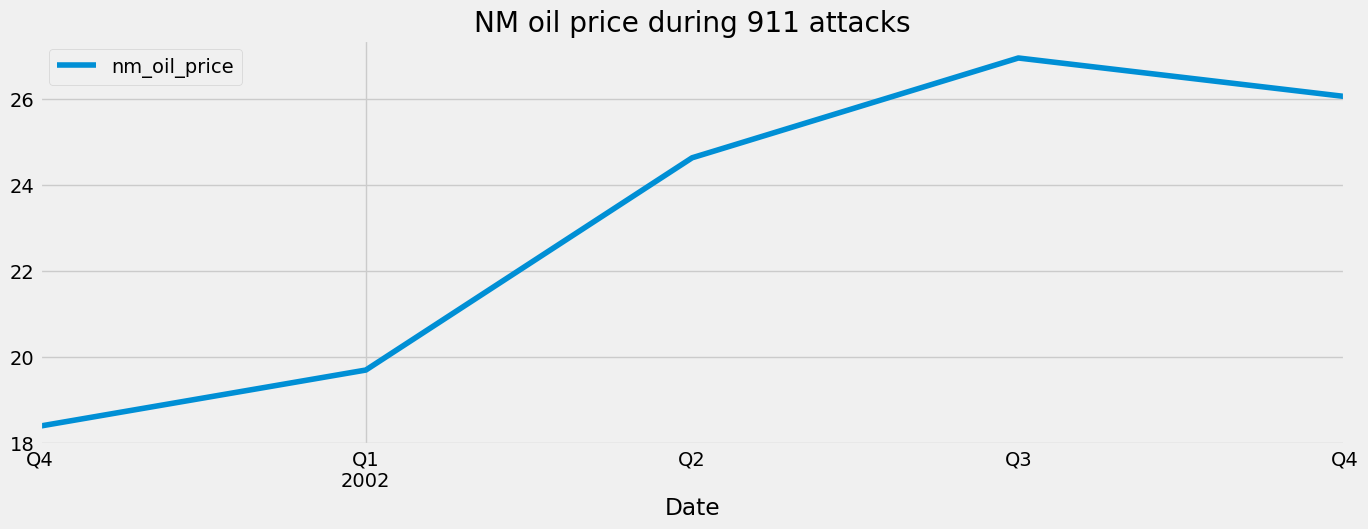

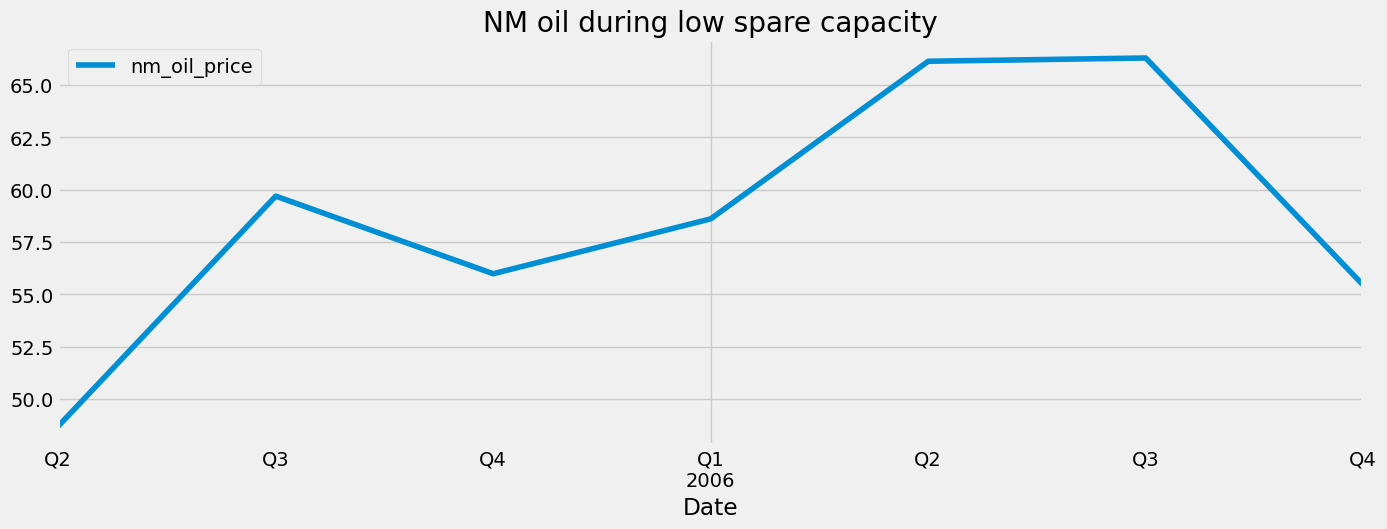

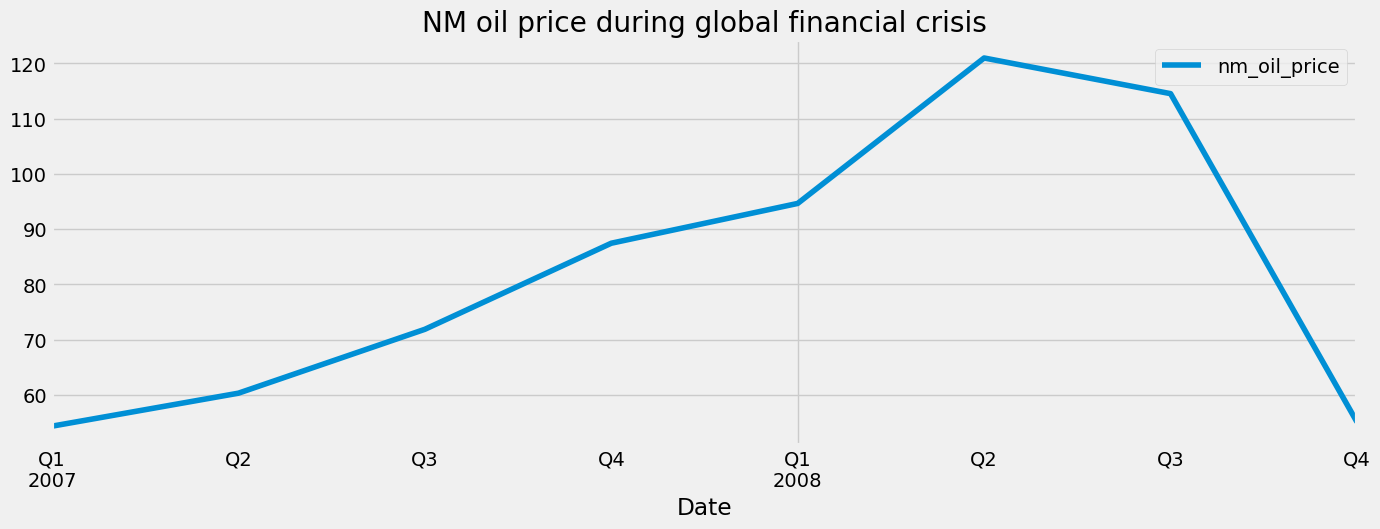

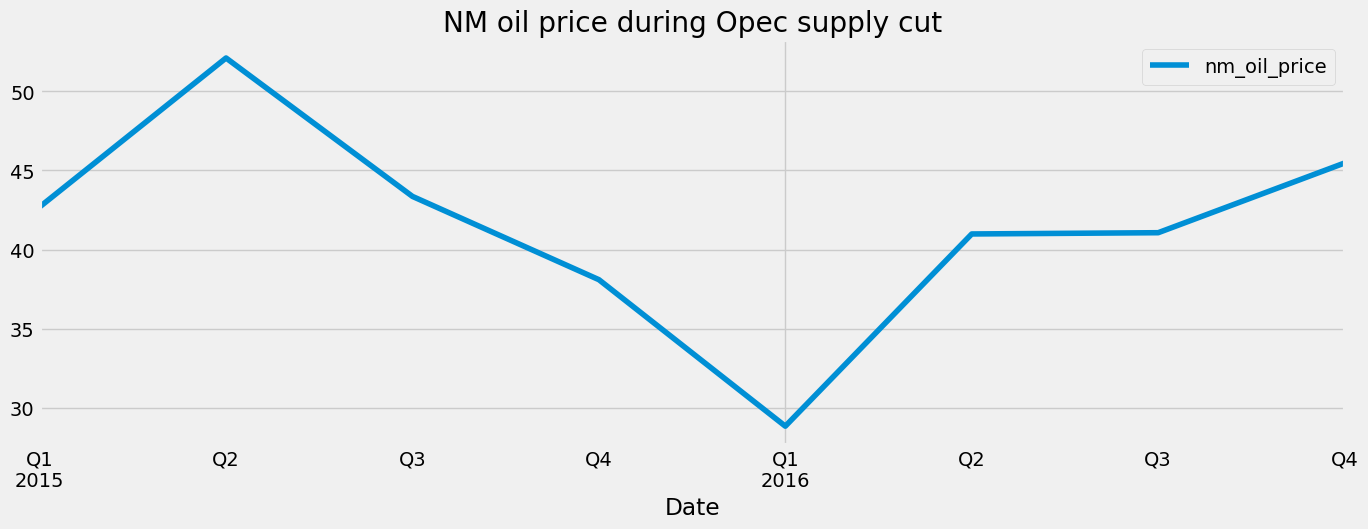

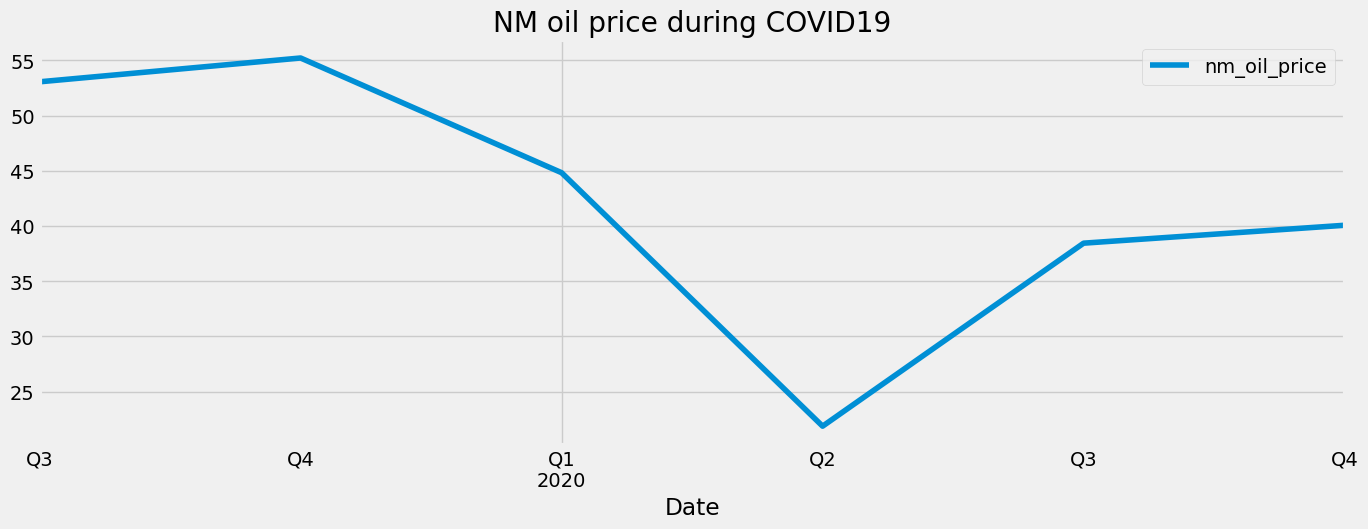

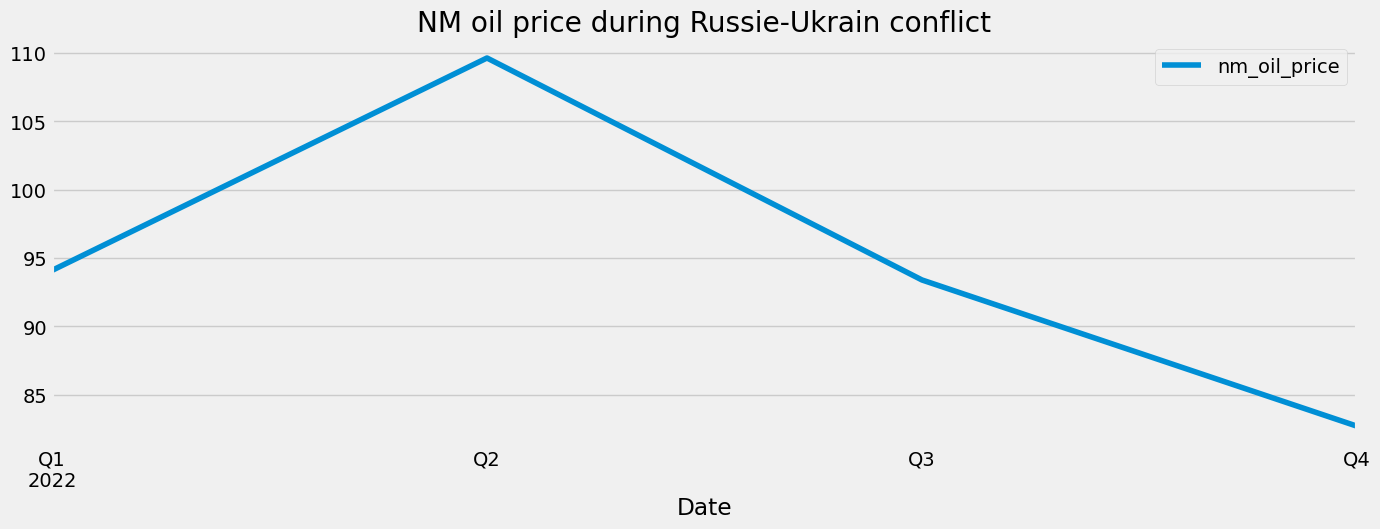

In [6]:

df_nm.loc[(df_nm.index >= '2001-01-01') & (df_nm.index <= '2002-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during 911 attacks')
plt.show()

df_nm.loc[(df_nm.index >= '2005-04-01') & (df_nm.index <= '2006-10-01')] \
    .plot(figsize=(15, 5), title='NM oil during low spare capacity')
plt.show()

df_nm.loc[(df_nm.index >= '2007-01-01') & (df_nm.index <= '2008-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during global financial crisis')
plt.show()

df_nm.loc[(df_nm.index >= '2015-01-01') & (df_nm.index <= '2016-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during Opec supply cut')
plt.show()

df_nm.loc[(df_nm.index >= '2019-06-01') & (df_nm.index <= '2020-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during COVID19')

df_nm.loc[(df_nm.index >= '2022-01-01') & (df_nm.index <= '2022-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during Russie-Ukrain conflict')

plt.show()

In [7]:
def create_features(df_nm):
    """
    Create time series features based on time series index.
    """
    df_nm = df_nm.copy()
    df_nm['quarter'] = df_nm.index.quarter
    df_nm['year'] = df_nm.index.year
    return df_nm

df_nm = create_features(df_nm)

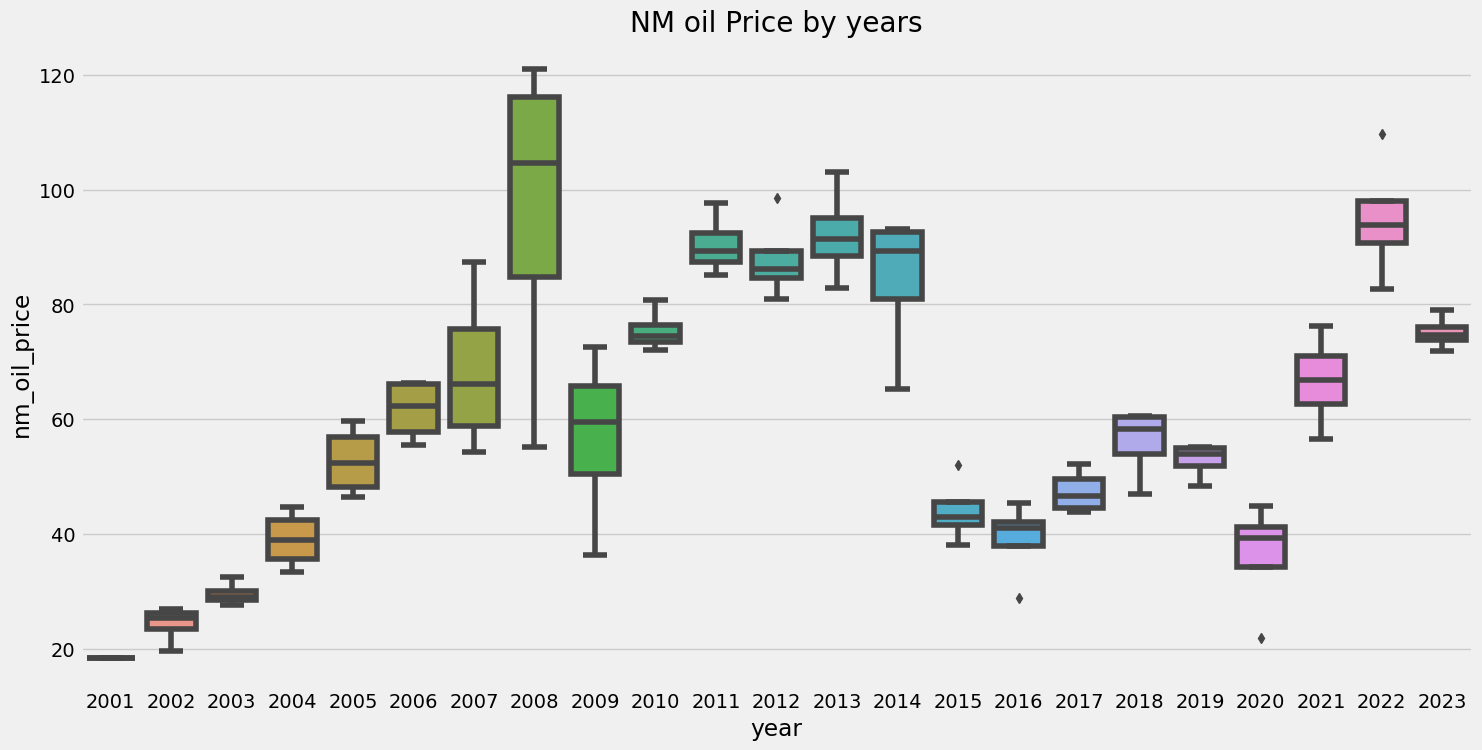

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df_nm, x='year', y='nm_oil_price')
ax.set_title('NM oil Price by years')
plt.show()

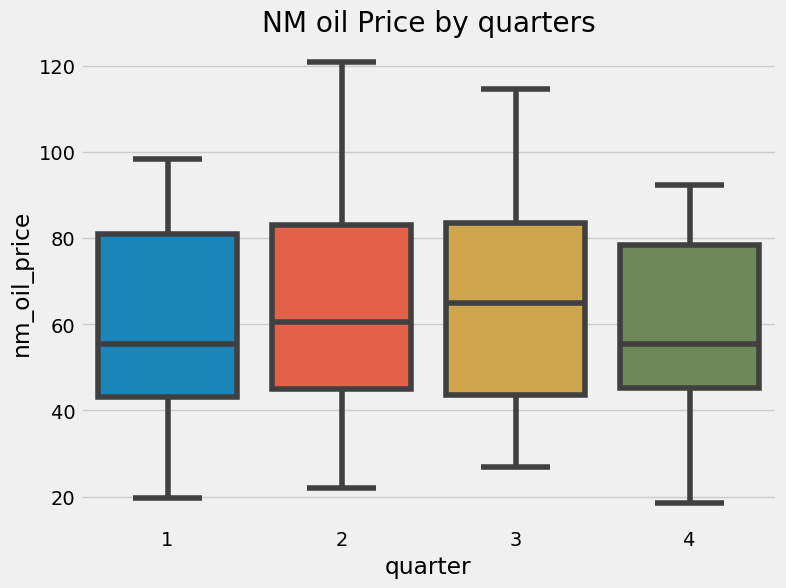

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_nm, x='quarter', y='nm_oil_price')
ax.set_title('NM oil Price by quarters')
plt.show()

# Creating train-test split

## Plotting the train-test split

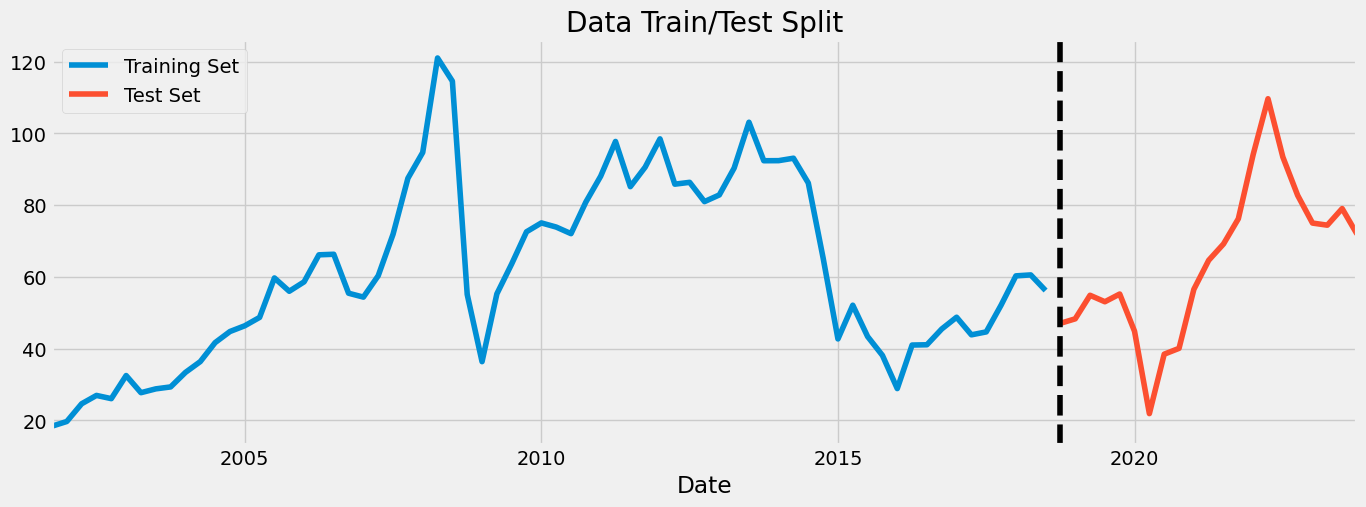

In [10]:
train = df.loc[df.index < '10-01-2018']
test = df.loc[(df.index >= '10-01-2018') & (df.index <= '2023-12-30')]

fig, ax = plt.subplots(figsize=(15, 5))
train["nm_oil_price"].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test["nm_oil_price"].plot(ax=ax, label='Test Set')
ax.axvline('10-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Creating model features

In [11]:
train = create_features(train)
test = create_features(test)

FEATURES = ['wti_spot_price_sead', 'brent_spot_price_sead', 'dubai_price_sead',\
       'index_china_gdp_sead', 'index_us_gdp_sead', 'index_cboe_volt_sead',\
       'us_unemploy_sead', 'index_ip_mining_sead', 'index_cpi_china_sead',\
       'opec_sead', 'non_opec_sead', 'index_cpi_us_sead', 'index_energy_sead',\
       'index_metal_sead', 'index_precious_sead', 'del_supply_nonopec_sead',\
       'del_cap_per_sead', 'del_world_gdp_per_sead', 'del_supply_saudi_sead',\
       'opec_spare_capacity_sead', 'oecd_inventory_sead',\
       'del_world_consump_sead', 'sv_911', 'sv_covid19', 'sv_gfc', 'sv_lpc',\
       'sv_opec', 'sv_con22']

TARGET = 'nm_oil_price'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [12]:
# print(train.keys())
#X_train

# Running XGBoost regression

## Running regreesion on train data

In [13]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=6000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:65.34917	validation_1-rmse:67.05680
[100]	validation_0-rmse:59.49587	validation_1-rmse:60.38389
[200]	validation_0-rmse:54.18188	validation_1-rmse:54.34518
[300]	validation_0-rmse:49.35745	validation_1-rmse:48.92260
[400]	validation_0-rmse:44.97784	validation_1-rmse:43.99726
[500]	validation_0-rmse:41.00271	validation_1-rmse:39.54300
[600]	validation_0-rmse:37.39546	validation_1-rmse:35.52829
[700]	validation_0-rmse:34.12365	validation_1-rmse:31.90074
[800]	validation_0-rmse:31.15646	validation_1-rmse:28.65452
[900]	validation_0-rmse:28.46793	validation_1-rmse:25.76001
[1000]	validation_0-rmse:26.03287	validation_1-rmse:23.16872
[1100]	validation_0-rmse:23.82758	validation_1-rmse:20.85018
[1200]	validation_0-rmse:21.83365	validation_1-rmse:18.79789
[1300]	validation_0-rmse:20.02950	validation_1-rmse:17.03718
[1400]	validation_0-rmse:18.39304	validation_1-rmse:15.63285
[1500]	validation_0-rmse:16.90523	validation_1-rmse:14.30208
[1600]	validation_0-rmse:15.54989	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=6000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Plotting variable importance

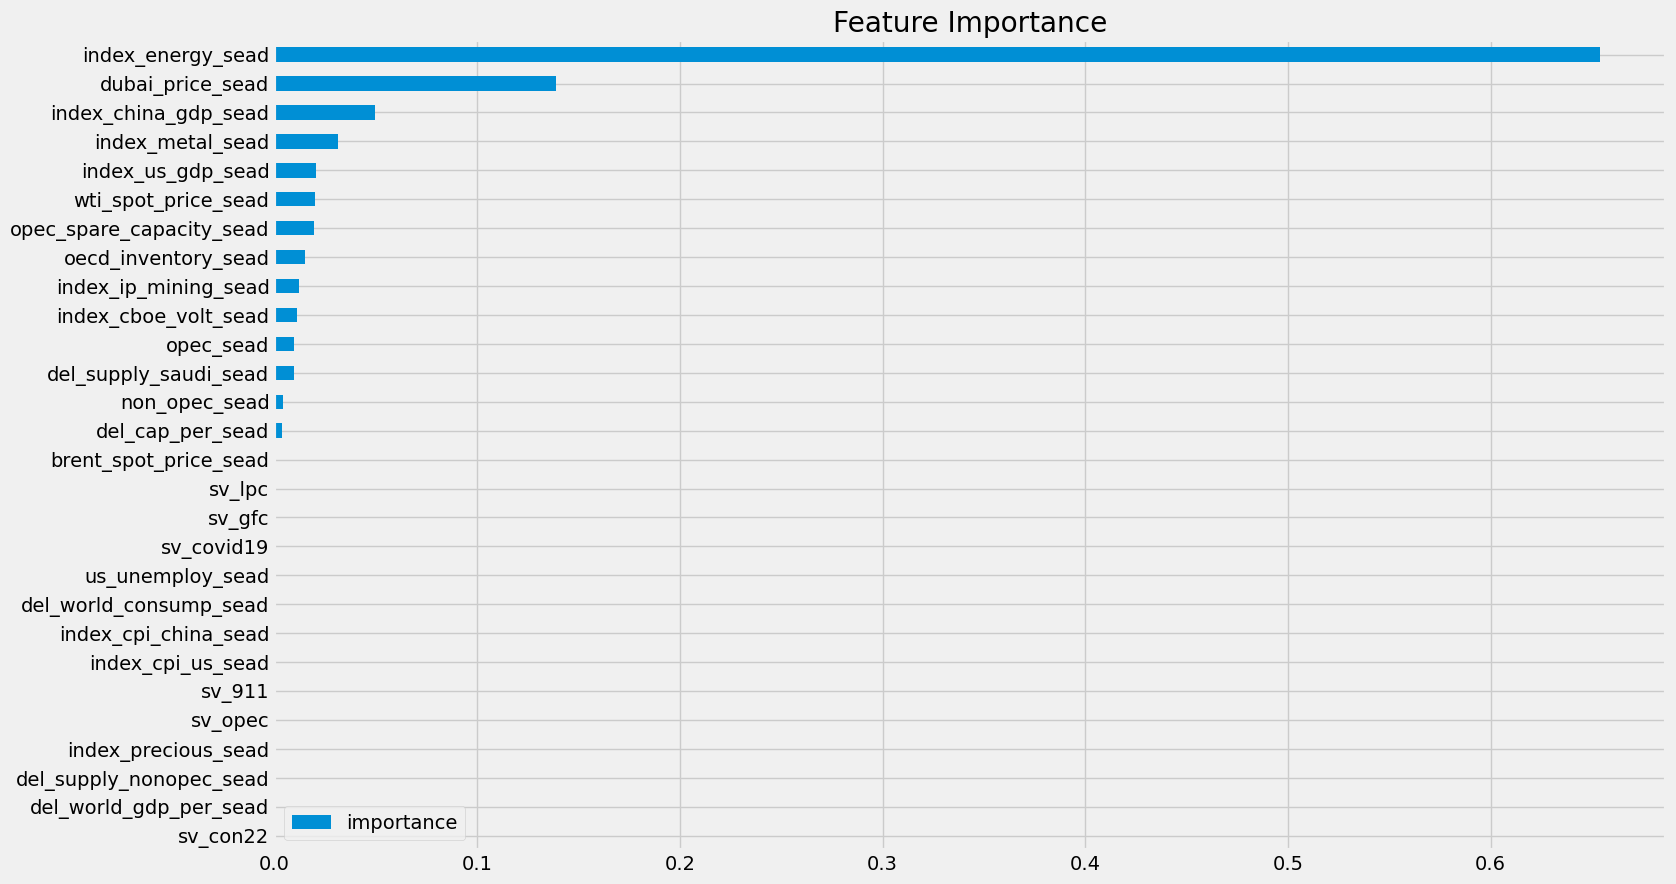

In [14]:
fi = pd.DataFrame(data=reg.feature_importances_, 
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', figsize=(16, 10), title='Feature Importance')
plt.show()

## Fitting the model with test data

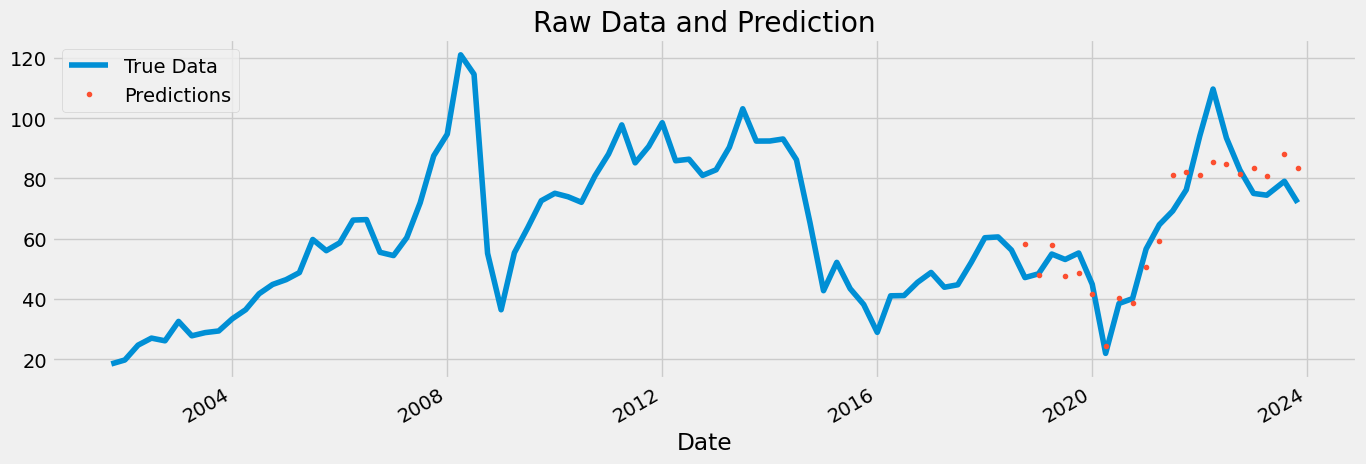

In [15]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['nm_oil_price']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()
# df.to_csv('file_name_1.csv')

## Calculating mean squared error (MSE)

In [16]:
score = np.sqrt(mean_squared_error(test['nm_oil_price'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 8.82


## Calcultating absolute sum of error (ASE)

In [17]:
ase = test['error'] = sum(np.abs(test[TARGET] - test['prediction']))
print(ase)

148.00161662461204


In [18]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=4*1, gap=0)
df = df.sort_index()

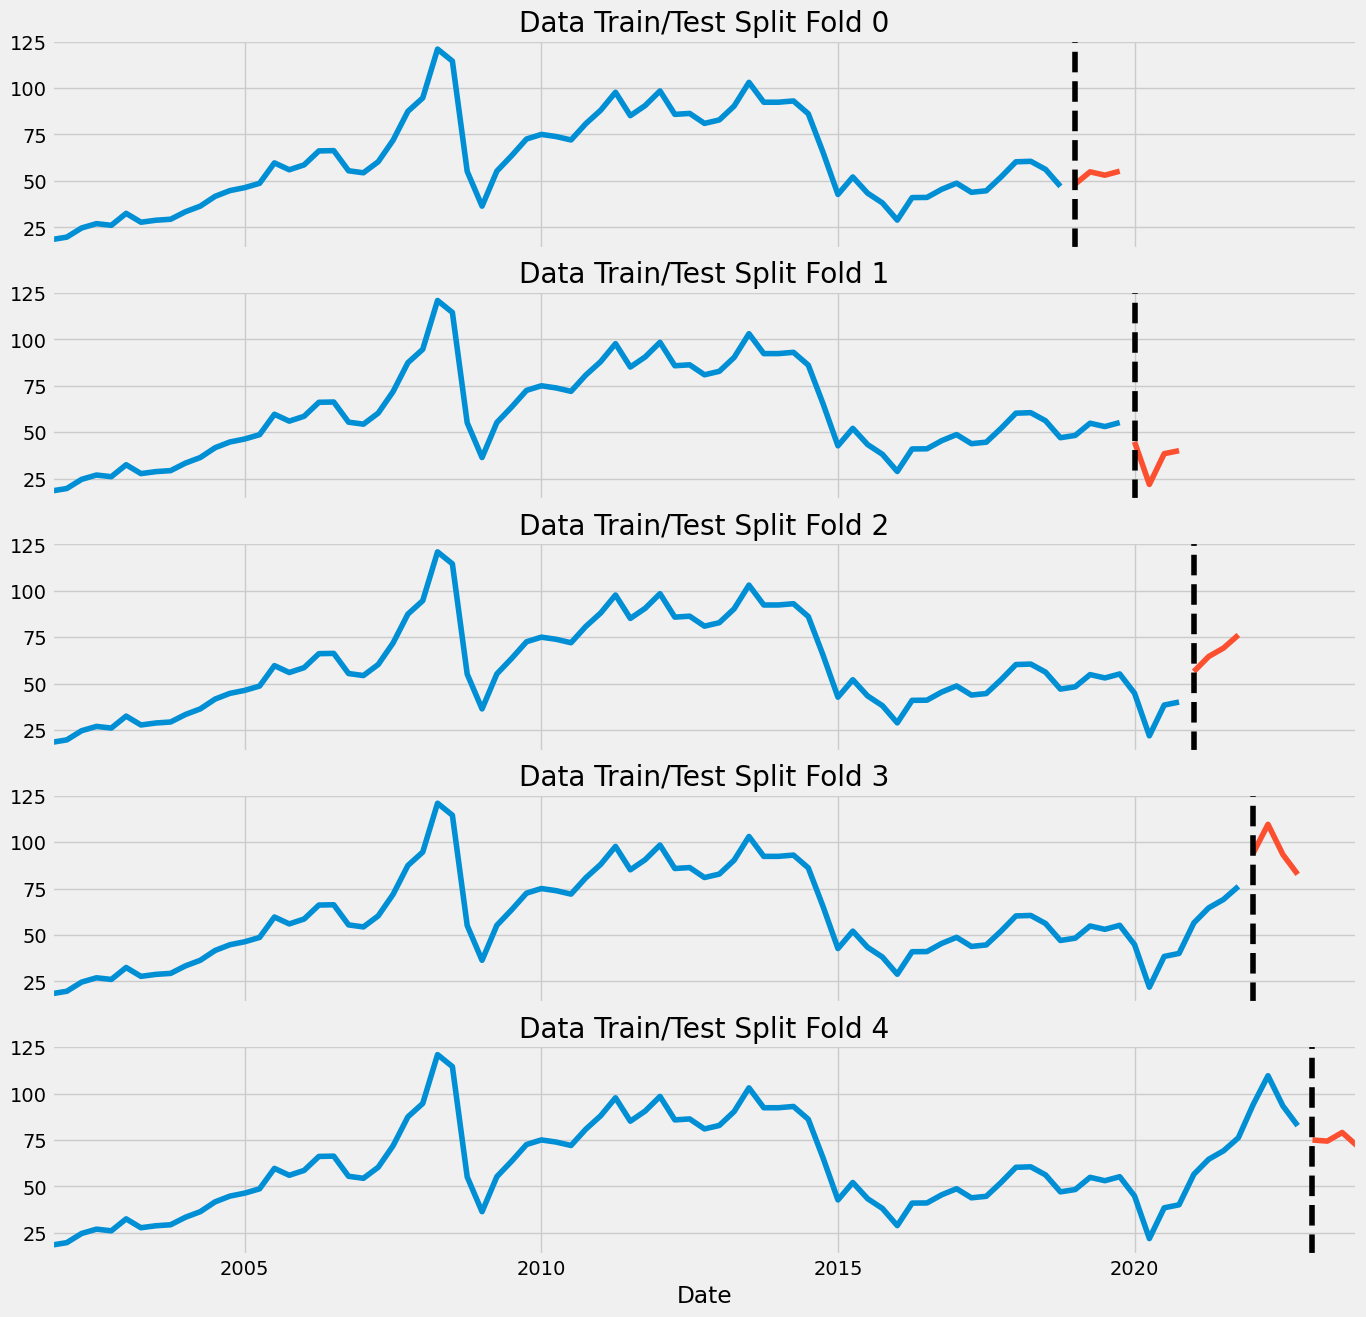

In [19]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['nm_oil_price'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['nm_oil_price'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

# Model tuning

## K-fold cross-validation

### Creating folds, model features and running XGBoost regression

In [20]:
tss = TimeSeriesSplit(n_splits=5, test_size=4*1, gap=0)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['wti_spot_price_sead', 'brent_spot_price_sead', 'dubai_price_sead',\
       'index_china_gdp_sead', 'index_us_gdp_sead', 'index_cboe_volt_sead',\
       'us_unemploy_sead', 'index_ip_mining_sead', 'index_cpi_china_sead',\
       'opec_sead', 'non_opec_sead', 'index_cpi_us_sead', 'index_energy_sead',\
       'index_metal_sead', 'index_precious_sead', 'del_supply_nonopec_sead',\
       'del_cap_per_sead', 'del_world_gdp_per_sead', 'del_supply_saudi_sead',\
       'opec_spare_capacity_sead', 'oecd_inventory_sead',\
       'del_world_consump_sead', 'sv_911', 'sv_covid19', 'sv_gfc', 'sv_lpc',\
       'sv_opec', 'sv_con22']
    
    TARGET = 'nm_oil_price'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=800,
                           early_stopping_rounds=50,
                           objective='reg:squarederror',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:64.56456	validation_1-rmse:51.87172
[100]	validation_0-rmse:25.66177	validation_1-rmse:18.56000
[200]	validation_0-rmse:11.03241	validation_1-rmse:7.79978
[300]	validation_0-rmse:5.21187	validation_1-rmse:5.13844
[400]	validation_0-rmse:2.83193	validation_1-rmse:4.73634
[454]	validation_0-rmse:2.13997	validation_1-rmse:4.85514
[0]	validation_0-rmse:63.93612	validation_1-rmse:36.51729
[100]	validation_0-rmse:25.37968	validation_1-rmse:14.03379
[200]	validation_0-rmse:10.89945	validation_1-rmse:6.19863
[300]	validation_0-rmse:5.15141	validation_1-rmse:4.17172
[313]	validation_0-rmse:4.72573	validation_1-rmse:5.01738
[0]	validation_0-rmse:62.80584	validation_1-rmse:65.78134
[100]	validation_0-rmse:24.90846	validation_1-rmse:20.39507
[200]	validation_0-rmse:10.68260	validation_1-rmse:8.76082
[286]	validation_0-rmse:5.50425	validation_1-rmse:8.58562
[0]	validation_0-rmse:62.96040	validation_1-rmse:94.09051
[100]	validation_0-rmse:24.98977	validation_1-rmse:42.77232
[20

### Calculating the fold scores

In [21]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 6.9409
Fold scores:[4.733191147624385, 2.4944184359041683, 8.09433950555866, 15.193505891523218, 4.1888650318977065]


### Plotting variable importance factors

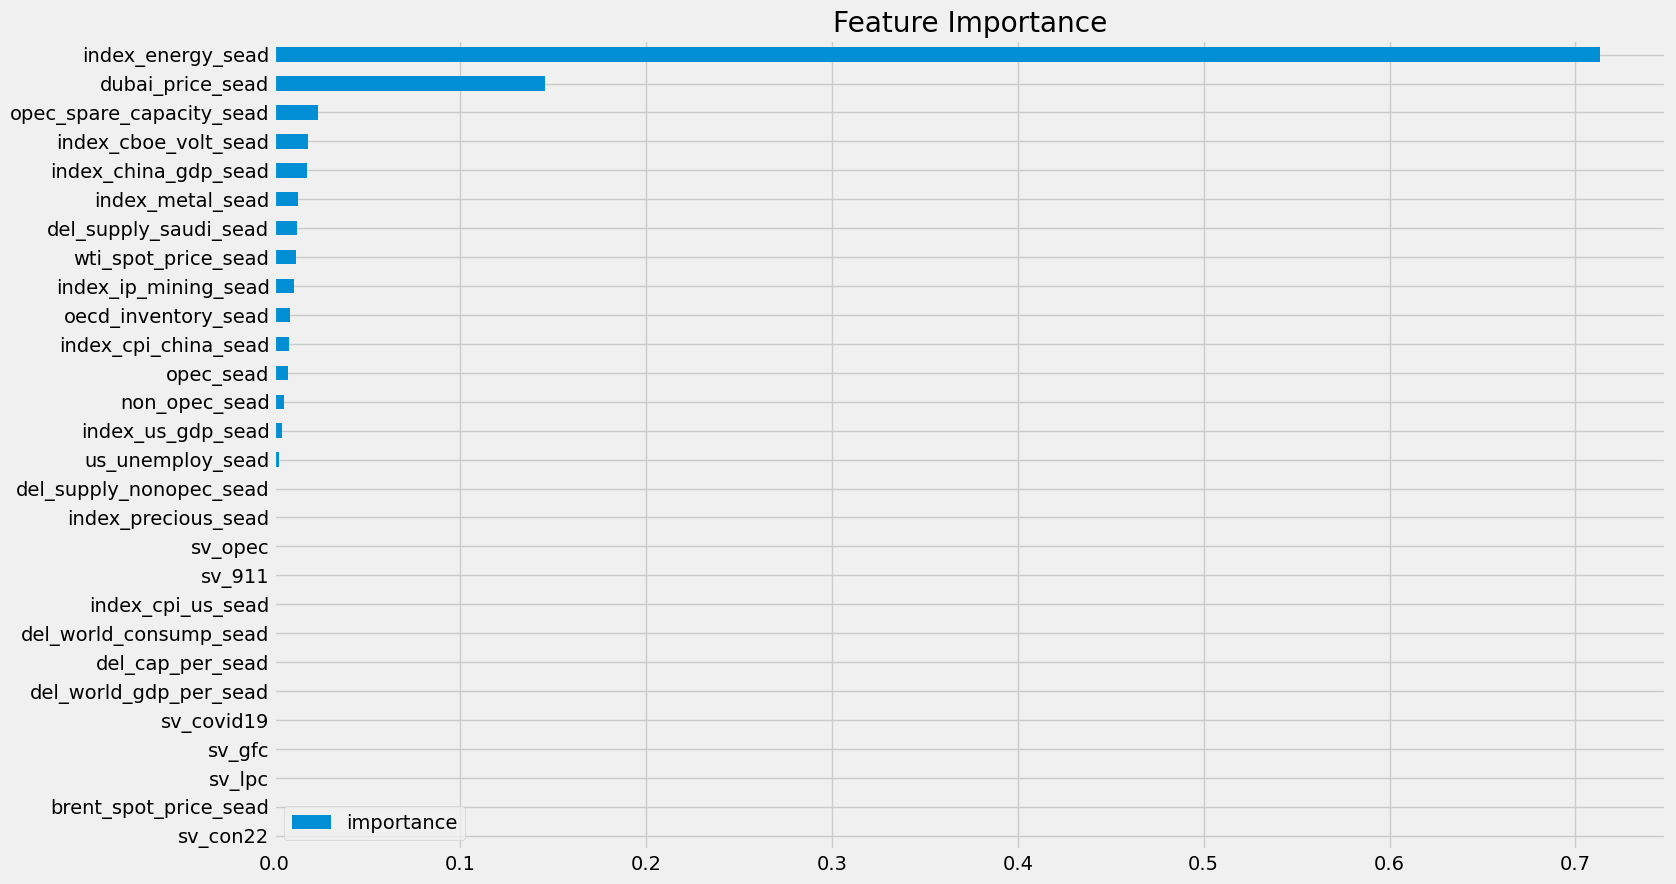

In [22]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', figsize=(16, 10), title='Feature Importance')
plt.show()

### Fitting the model with test data

In [23]:
test['prediction'] = reg.predict(X_test)
test

,nm_oil_price,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sead,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_con22,sv_covid19,sv_gfc,sv_lpc,sv_opec,prediction,quarter,year
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,74.988884,-8.722612,-9.820590,83.411862,-0.039649,1.199596,21.067296,-0.112388,3.005648,-0.464225,410.583015,192.563426,0.384574,4.319581,10.418087,10.418087,0.344668,-2.102374,-2.102374,1.573151,2.322009,-62.081794,0.097760,0,0,0,0,0,0,75.973534,1,2023
2023-04-01,74.403726,-4.783938,-5.413929,81.985328,0.065365,0.589772,16.543778,0.031577,-0.399971,-1.142951,440.906662,150.267333,0.116620,1.124914,3.925616,3.925616,-0.800367,-4.284504,-4.284504,1.547432,1.353702,54.538415,0.922144,0,0,0,0,0,0,69.536629,2,2023
2023-07-30,79.028328,-5.840083,2.325382,82.876366,-0.911323,1.194047,20.085571,-0.171856,4.561210,-0.307783,-13.773642,706.923950,0.131866,7.751447,13.733174,13.733174,-0.073360,-2.115845,-2.115845,1.474484,2.227800,2.757692,3.388950,0,0,0,0,0,0,74.816254,3,2023
2023-10-28,71.919868,-13.529203,-17.535038,74.711807,-0.164480,0.781384,22.119646,0.032615,3.015453,0.054584,806.919678,2.971413,-0.057139,12.629313,-6.686675,-6.686675,0.283199,-1.947022,-1.947022,1.927348,1.501382,-35.975090,-5.467120,0,0,0,0,0,0,77.191170,4,2023


In [24]:
#df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df

,nm_oil_price,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sead,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_con22,sv_covid19,sv_gfc,sv_lpc,sv_opec,prediction
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-01,18.382252,-4.342383,-3.968467,19.839120,0.006341,0.227692,25.182127,0.598185,-1.049224,-0.878374,-860.532052,209.852757,0.008106,29.522924,24.809339,24.809339,0.084463,1.138198,1.138198,-1.118946,5.075132,56.341081,0.886441,1,0,0,0,0,0,NaN
2002-01-01,19.688715,0.427090,1.022115,21.054340,0.274799,0.267035,24.369796,0.248901,-2.372902,-0.483836,-886.492953,165.252032,0.073489,29.581693,26.429118,26.429118,0.324740,0.941955,0.941955,-1.218224,6.418517,50.448373,0.874506,1,0,0,0,0,0,NaN
2002-04-01,24.628390,4.314811,3.536845,22.390446,0.304478,0.281793,22.733795,0.117970,-0.235625,-0.611690,-136.395130,514.958291,0.173884,31.382044,28.561953,28.561953,0.136906,1.512703,1.512703,-0.638675,6.401378,-14.152539,0.243086,1,0,0,0,0,0,NaN
2002-07-01,26.950806,1.127654,0.855471,25.571612,0.041236,0.398350,30.216726,-0.066227,-0.265306,0.415096,278.343246,-212.358794,0.255128,32.301880,26.088024,26.088024,-0.388310,0.861509,0.861509,-0.180427,6.009794,-50.993165,-1.084011,1,0,0,0,0,0,NaN
2002-10-01,26.055377,1.891115,2.044512,26.010084,-0.031823,0.446995,33.527721,0.067198,-0.856318,0.164035,743.943666,104.734647,0.280038,34.560932,27.841472,27.841472,0.021625,0.025518,0.025518,0.427349,4.452041,-47.218326,0.445259,1,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,82.709246,-8.473781,-10.735306,86.095092,-0.111888,1.318156,23.570406,0.082760,0.079301,-0.903986,308.596327,85.197106,0.199640,21.486896,5.892569,5.892569,0.007855,0.081845,0.081845,0.459791,4.370983,-34.955475,0.413827,0,1,0,0,0,0,81.533875
2023-01-01,74.988884,-8.722612,-9.820590,83.411862,-0.039649,1.199596,21.067296,-0.112388,3.005648,-0.464225,410.583015,192.563426,0.384574,4.319581,10.418087,10.418087,0.344668,-2.102374,-2.102374,1.573151,2.322009,-62.081794,0.097760,0,0,0,0,0,0,83.306572
2023-04-01,74.403726,-4.783938,-5.413929,81.985328,0.065365,0.589772,16.543778,0.031577,-0.399971,-1.142951,440.906662,150.267333,0.116620,1.124914,3.925616,3.925616,-0.800367,-4.284504,-4.284504,1.547432,1.353702,54.538415,0.922144,0,0,0,0,0,0,80.928070


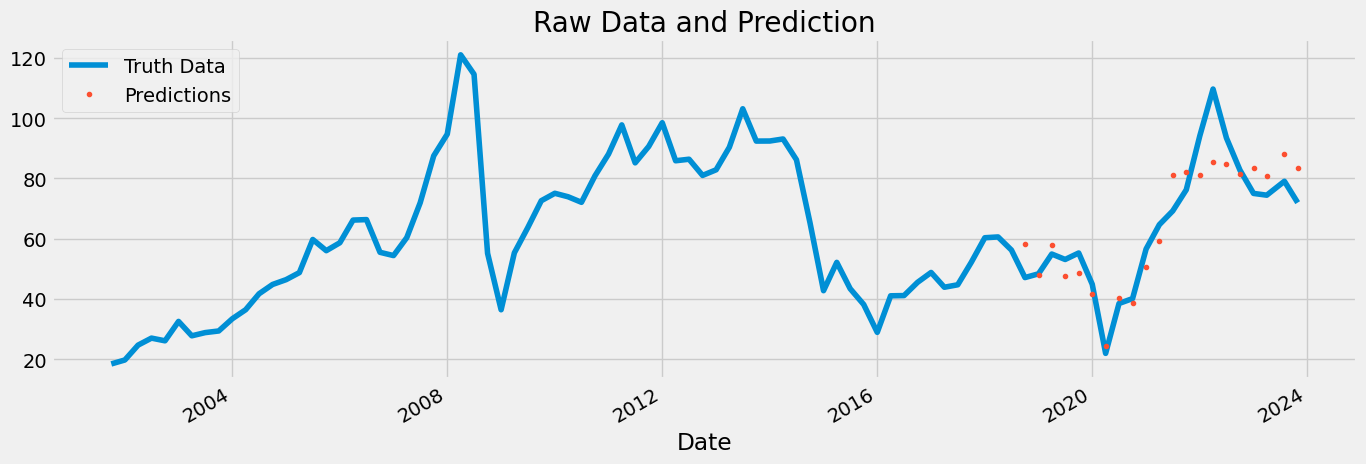

In [25]:
ax = df[['nm_oil_price']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()
# df.to_csv('file_name.csv')

### Calculating mean squared error (MSE)

In [26]:
score = np.sqrt(mean_squared_error(test['nm_oil_price'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4.19


### Calcultating absolute sum of error (ASE)

In [27]:
ase = test['error'] = sum(np.abs(test[TARGET] - test['prediction']))
print(ase)

15.335122426683029


# Running XGBoost using the entire datatset

In [28]:
df = pd.DataFrame(pd.read_excel(r'C:\Users\asifr\OneDrive - State of New Mexico\Documents\Project Oil Price\Outputs\df_final.xlsx'))
pd.options.display.max_columns = 500
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

train = df.loc[df.index < '04-01-2023']
test = df.loc[df.index >= '04-01-2023']

# fig, ax = plt.subplots(figsize=(15, 5))
# train["nm_oil_price"].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
# test["nm_oil_price"].plot(ax=ax, label='Test Set')
# ax.axvline('04-01-2023', color='black', ls='--')
# ax.legend(['Training Set', 'Test Set'])
# plt.show()

In [29]:
train = create_features(train)
test = create_features(test)

FEATURES = ['wti_spot_price_sead', 'brent_spot_price_sead', 'dubai_price_sead',\
       'index_china_gdp_sead', 'index_us_gdp_sead', 'index_cboe_volt_sead',\
       'us_unemploy_sead', 'index_ip_mining_sead', 'index_cpi_china_sead',\
       'opec_sead', 'non_opec_sead', 'index_cpi_us_sead', 'index_energy_sead',\
       'index_metal_sead', 'index_precious_sead', 'del_supply_nonopec_sead',\
       'del_cap_per_sead', 'del_world_gdp_per_sead', 'del_supply_saudi_sead',\
       'opec_spare_capacity_sead', 'oecd_inventory_sead',\
       'del_world_consump_sead', 'sv_911', 'sv_covid19', 'sv_gfc', 'sv_lpc',\
       'sv_opec', 'sv_con22']

TARGET = 'nm_oil_price'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

## Running regreesion on train data (entire dataset till year 2023)

In [30]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=6000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:65.42691	validation_1-rmse:70.98767
[100]	validation_0-rmse:59.51782	validation_1-rmse:62.72649
[200]	validation_0-rmse:54.16099	validation_1-rmse:55.23467
[300]	validation_0-rmse:49.30564	validation_1-rmse:48.44345
[400]	validation_0-rmse:44.90696	validation_1-rmse:42.29099
[500]	validation_0-rmse:40.92198	validation_1-rmse:36.72197
[600]	validation_0-rmse:37.31261	validation_1-rmse:31.68729
[700]	validation_0-rmse:34.04456	validation_1-rmse:28.10193
[800]	validation_0-rmse:31.08228	validation_1-rmse:24.82998
[900]	validation_0-rmse:28.39743	validation_1-rmse:22.08027
[1000]	validation_0-rmse:25.96377	validation_1-rmse:19.66442
[1100]	validation_0-rmse:23.75978	validation_1-rmse:17.48978
[1200]	validation_0-rmse:21.75975	validation_1-rmse:15.33203
[1300]	validation_0-rmse:19.94330	validation_1-rmse:13.46150
[1400]	validation_0-rmse:18.29124	validation_1-rmse:11.88039
[1500]	validation_0-rmse:16.78938	validation_1-rmse:10.60061
[1600]	validation_0-rmse:15.42262	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=6000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

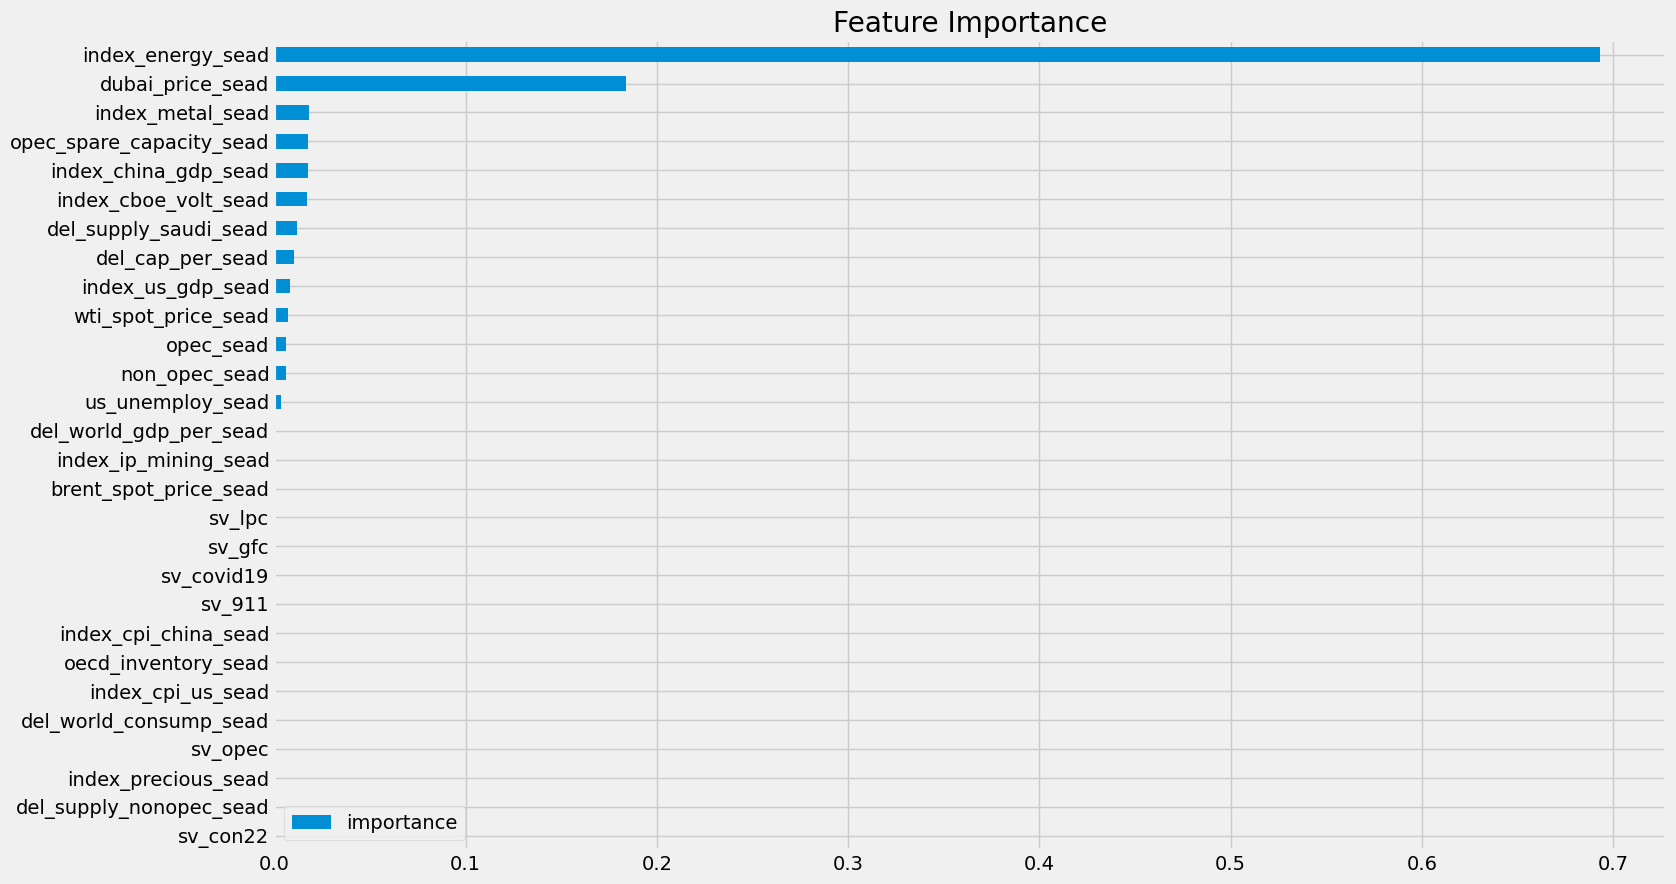

In [31]:
fi = pd.DataFrame(data=reg.feature_importances_, 
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', figsize=(16, 10), title='Feature Importance')
plt.show()

In [32]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
# ax = df[['nm_oil_price']].plot(figsize=(15, 5))
# df['prediction'].plot(ax=ax, style='.')
# plt.legend(['True Data', 'Predictions'])
# ax.set_title('Raw Data and Prediction')
# plt.show()
#df.to_csv('file_name_1.csv')

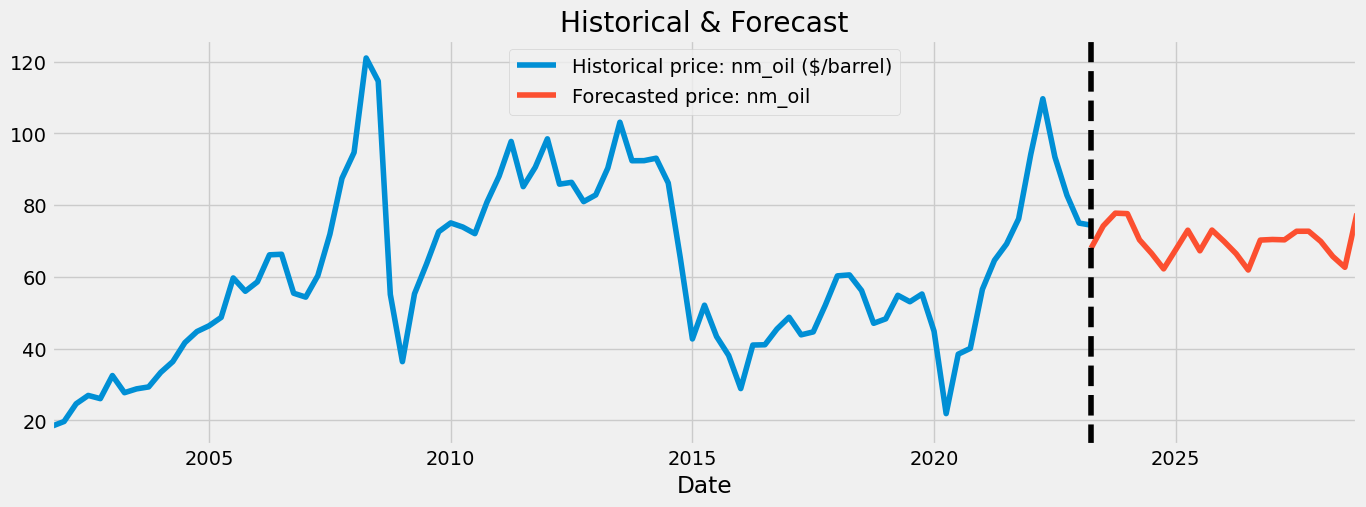

In [33]:
actual = df.loc[df.index < '07-01-2023']
predicted = test.loc[(test.index >= '07-01-2023')]

fig, ax = plt.subplots(figsize=(15, 5))
actual["nm_oil_price"].plot(ax=ax, label='Historical price', title='Historical & Forecast')
test["prediction"].plot(ax=ax, label='Forecast')
ax.axvline('04-01-2023', color='black', ls='--')
ax.legend(['Historical price: nm_oil ($/barrel)', 'Forecasted price: nm_oil'])
#plt.show()
plt.savefig(r'C:\Users\asifr\OneDrive - State of New Mexico\Documents\Project Oil Price\temp\image0.png')

# Exporting results to excel workbook

In [34]:
forecast = predicted[['prediction']]
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(r'C:\Users\asifr\OneDrive - State of New Mexico\Documents\Project Oil Price\Outputs\TRD_oil_price_forecast.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
forecast.to_excel(writer, sheet_name='Forecast')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['Forecast']

# Insert an image.
worksheet.insert_image('D2', r'C:\Users\asifr\OneDrive - State of New Mexico\Documents\Project Oil Price\temp\image0.png')
writer.close()